In [144]:

import numpy as np
import pandas as pd
import scipy.stats as stats
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
%matplotlib inlineS

In [146]:
#laod and read data file
'''inside the quotationis a filepath of the data file'''
df = pd.read_csv(r'C:\Users\BUYPC COMPUTERS\Downloads\Unicorn_Companies.csv')
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital Investment Group, Matrix Partners China"
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, Northzone Ventures"


In [147]:
## Data inspections and MAnipulation
df.shape

(1074, 10)

In [148]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [149]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital Investment Group, Matrix Partners China"
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, Northzone Ventures"
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [5]:
#view the summary statistics of the dataset
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [152]:
# check for missing values
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [7]:
#Why do the record with the city empty? does it means that a sale is not recorded?
'''maybe the city was not recorded'''

'maybe the city was not recorded'

In [154]:
df.City.mode()

0    San Francisco
Name: City, dtype: object

In [155]:
### apply the ffill method to both 'City' and 'Select investors" columns
df['City'] = df['City'].ffill()
df['Select Investors'] = df['Select Investors'].ffill()

### print the updated dataframe
print(df.head())

     Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B  2017-04-07          Artificial intelligence   
1     SpaceX     $100B  2012-12-01                            Other   
2      SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
3     Stripe      $95B  2014-01-23                          Fintech   
4     Klarna      $46B  2011-12-12                          Fintech   

            City        Country      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                                           Select Investors  
0   Sequoia Capital China, SIG Asia Investments, Sina Weibo, S

In [161]:
df['Valuation'] = df['Valuation'].astype(str)
df['Valuation'] = df['Valuation'].replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').astype(float)
df['Funding'] = df['Funding'].astype(str)
df['Funding'] = df['Funding'].replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B', '000000000').astype(float)

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_864\1261965926.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_864\1261965926.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [162]:
# Convert the Date Joined column to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Convert the Year Founded column to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format='%Y')

# Calculate the age of the company at the time it joined the unicorn companies
df['Age at Joining'] = ((df['Date Joined'] - df['Year Founded']).dt.days / 365).round(1)

# Print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,...,Continent,Year Founded,Funding,Select Investors,Age at Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,...,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,...,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,...,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,...,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,...,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capital, General Atlantic",6.9


In [163]:
df.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age at Joining      0
dtype: int64

In [164]:
# create a new column call ROI (Return on Investment) or group by ROI
df['ROI'] = df['Valuation'] - df['Funding']
df.groupby(df['ROI']).head()


,Company,Valuation,Date Joined,Industry,City,...,Year Founded,Funding,Select Investors,Age at Joining,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,...,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",5.3,1.720000e+11
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,...,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",10.9,9.300000e+10
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,...,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",10.5,9.800000e+10
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,...,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,9.300000e+10
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,...,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capital, General Atlantic",6.9,4.200000e+10
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,...,2012-01-01,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital",5.5,6.210000e+08
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,...,2015-01-01,9.900000e+08,"58.com, Tencent Holdings",2.3,1.000000e+07
1071,Zihaiguo,1.000000e+09,2021-05-06,Consumer & retail,Chongqing,...,2018-01-01,8.000000e+07,"Xingwang Investment Management, China Capital Investment Group, Matrix Partners China",3.3,9.200000e+08
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,...,2005-01-01,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, Northzone Ventures",16.8,2.080000e+08


In [117]:
#convert the Date Join column to Datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# convert the Year Founded column to Datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format= '%Y')

# calculete the age of the company at the time it join the unicorn company
df['Age at Joining'] = ((df['Date Joined'] - df['Year Founded']).dt.days / 365).round(1)

#print the updated dataframe
df.head()

,Company,Valuation,Date Joined,Industry,City,...,Year Founded,Funding,Select Investors,Age at Joining,ROI
0,Bytedance,-388626432,2017-04-07,Artificial intelligence,Beijing,...,2012-01-01,8000000000,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",5.3,-8388626432
1,SpaceX,1215752192,2012-12-01,Other,Hawthorne,...,2002-01-01,7000000000,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",10.9,-5784247808
2,SHEIN,1215752192,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,...,2008-01-01,2000000000,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",10.5,-784247808
3,Stripe,510719488,2014-01-23,Fintech,San Francisco,...,2010-01-01,2000000000,"Khosla Ventures, LowercaseCapital, capitalG",4.1,-1489280512
4,Klarna,-1244640256,2011-12-12,Fintech,Stockholm,...,2005-01-01,4000000000,"Institutional Venture Partners, Sequoia Capital, General Atlantic",6.9,-5244640256


In [165]:
# Calculate the median age for joining the Unicorn company
df['Age at Joining'].describe()

count    1074.000000
mean        7.489851
std         5.316578
min        -3.200000
25%         4.425000
50%         6.500000
75%         9.100000
max        98.500000
Name: Age at Joining, dtype: float64

It Usually take about 6.5 years to become a unicorn company


In [166]:
# filter the datafrmae to show only rows where 'Age at Joining ' is negative

negative_age_df = df[df['Age at Joining']<0]

#print the filter dataframe

negative_age_df

,Company,Valuation,Date Joined,Industry,City,...,Year Founded,Funding,Select Investors,Age at Joining,ROI
714,Yidian Zixun,1.000000e+09,2017-10-17,Mobile & telecommunications,Beijing,...,2021-01-01,151000000.0,"Phoenix New Media, Tianjin Haihe Industry Fund",-3.2,849000000.0


The negative value in 'Age at joining'  column indicate that at least there is one record in the dataset where 
the age at joining is negative. This could be through data entry error or usual situation where a person 
joined the company before they were born. It is important to investigate the negative value further to determine the cause
whether to correct or remove the record.

Exploratory Data Analysis: Relationship and insight

    -Univariate Analysis
    
    -Biveriate Analysis
    
    -Multiveriate Analysis
    
    
    -Univeriate Analysis
    -Looking at variables and it visualization

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   float64       
 9   Select Investors  1074 non-null   object        
 10  Age at Joining    1074 non-null   float64       
 11  ROI               1074 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 100.8+ KB


In [118]:
df[['Valuation','Funding','Age at Joining', 'ROI']].describe().astype('int')

,Valuation,Funding,Age at Joining,ROI
count,1074,1074,1074,1074
mean,791947654,551042830,7,240904823
std,1076609518,807719436,5,1475788590
min,-1884901888,0,-3,-2147483648
25%,705032704,218000000,4,-422217296
50%,1000000000,365000000,6,731000000
75%,1705032704,603000000,9,1000000000
max,2115098112,-2147483648,98,2000000000


In [169]:
#what is the number of distinct companies
df['Company'].nunique()

1073

In [170]:
# find company with the most number of occurances
dist_com = df['Company'].value_counts()
most_common_company = dist_com.index[0]

#print the result
print(f"The company with the most number of occurance is {most_common_company}")

The company with the most number of occurance is Bolt


In [171]:
# count the number od occurances and select top 5
dist_com = df['Company'].value_counts().head(5)
dist_com

Bolt            2
Bytedance       1
Yidian Zixun    1
Klook           1
Epirus          1
Name: Company, dtype: int64

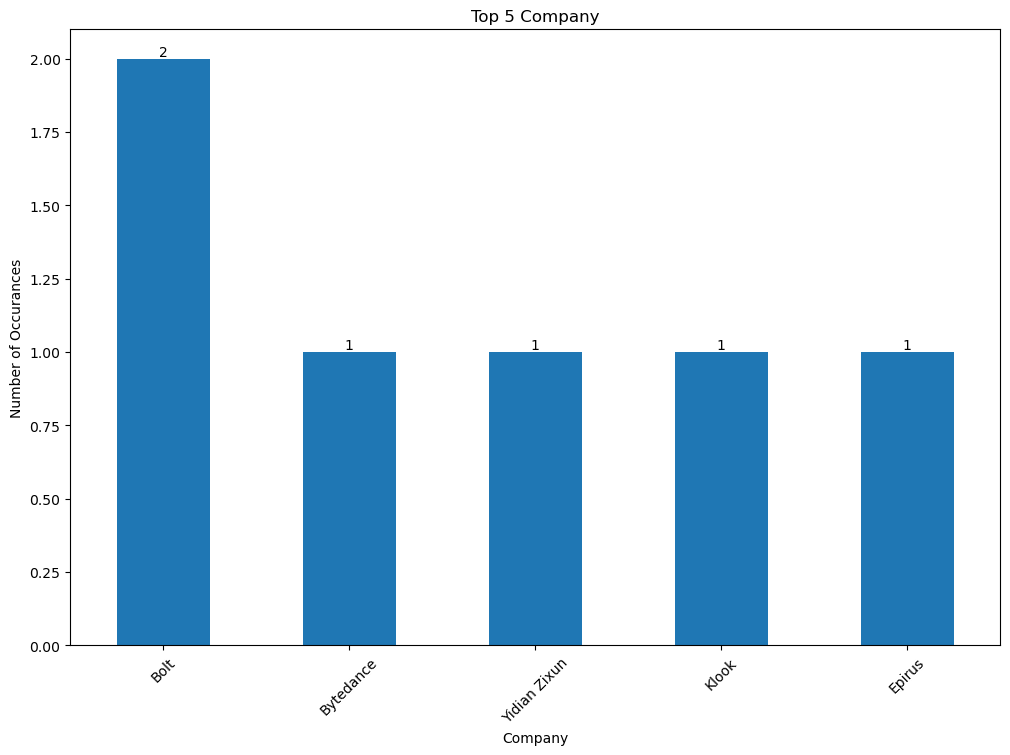

In [172]:
# create Barchart for top 5 companies
ax = dist_com.plot.bar(figsize=(12,8))

#set tittle and axis label
plt.title('Top 5 Company')
plt.xlabel('Company')
plt.ylabel('Number of Occurances')

#Rotate the x-axis label by 45 degrees
plt.xticks(rotation=45)

#add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

#show the plot
plt.show()

In [173]:
#The number if distinct city
df['City'].nunique()

256

In [174]:
# find city with the most number of occurances
dist_com = df['City'].value_counts()
most_common_city = dist_com.index[0]

#print the result
print(f"The city with the most number of occurance is {most_common_city}")

The city with the most number of occurance is San Francisco


In [175]:
# count the number od occurances and select top 5
dist_city = df['City'].value_counts().head(5)
dist_city

San Francisco    153
New York         108
Beijing           65
Shanghai          44
London            35
Name: City, dtype: int64

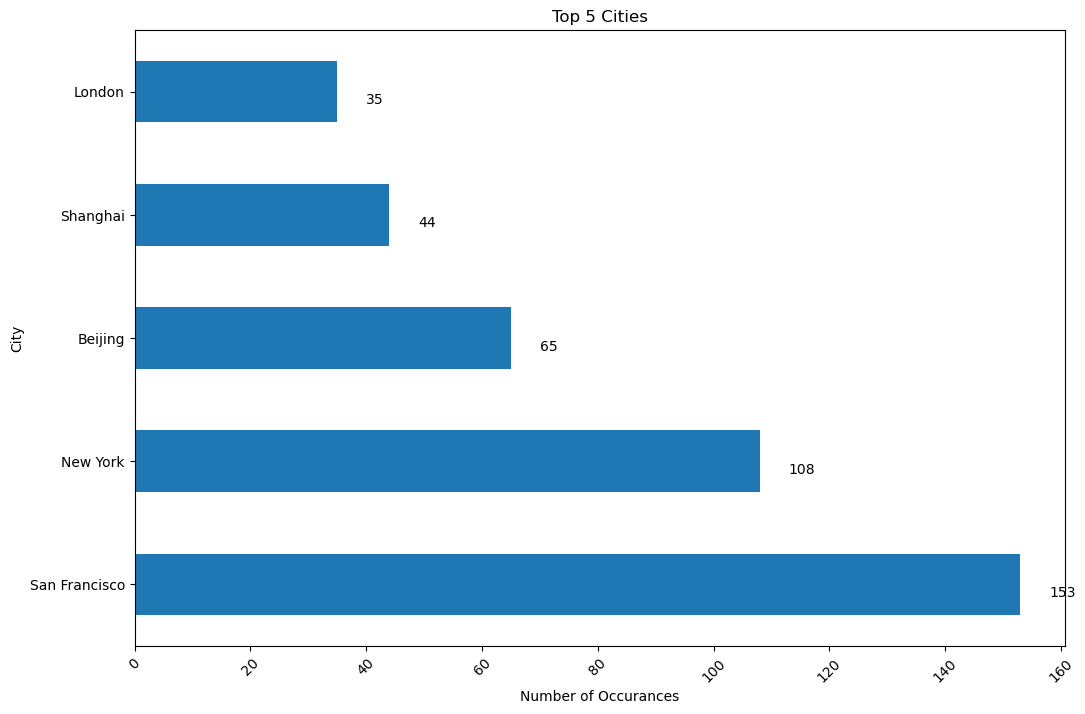

In [176]:
# create horizontal Barchart for top 5 cities
ax = dist_city.plot.barh(figsize=(12,8))


#Rotate the x-axis label by 45 degrees
plt.xticks(rotation=45)

#add data labels to the bars
for i, v in enumerate(dist_city):
    ax.text(v + 5, i - 0.1,str(v),color='black',fontweight='light')
#set tittle and axis label
plt.title('Top 5 Cities')
plt.xlabel('Number of Occurances')
plt.ylabel('City')
 
#show the plot
plt.show()

In [177]:
#The number if distinct Industry
df['Industry'].nunique()

16

In [178]:
# find company with the most occupied occurances
dist_ind = df['Industry'].value_counts()
most_common_industry = dist_ind.index[0]

#print the result
print(f"The industry with the most number of occupied is {most_common_industry}")

The industry with the most number of occupied is Fintech


In [179]:
# count the number of occupied and select top 5
dist_ind = df['Industry'].value_counts().head(10)
dist_ind

Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Name: Industry, dtype: int64

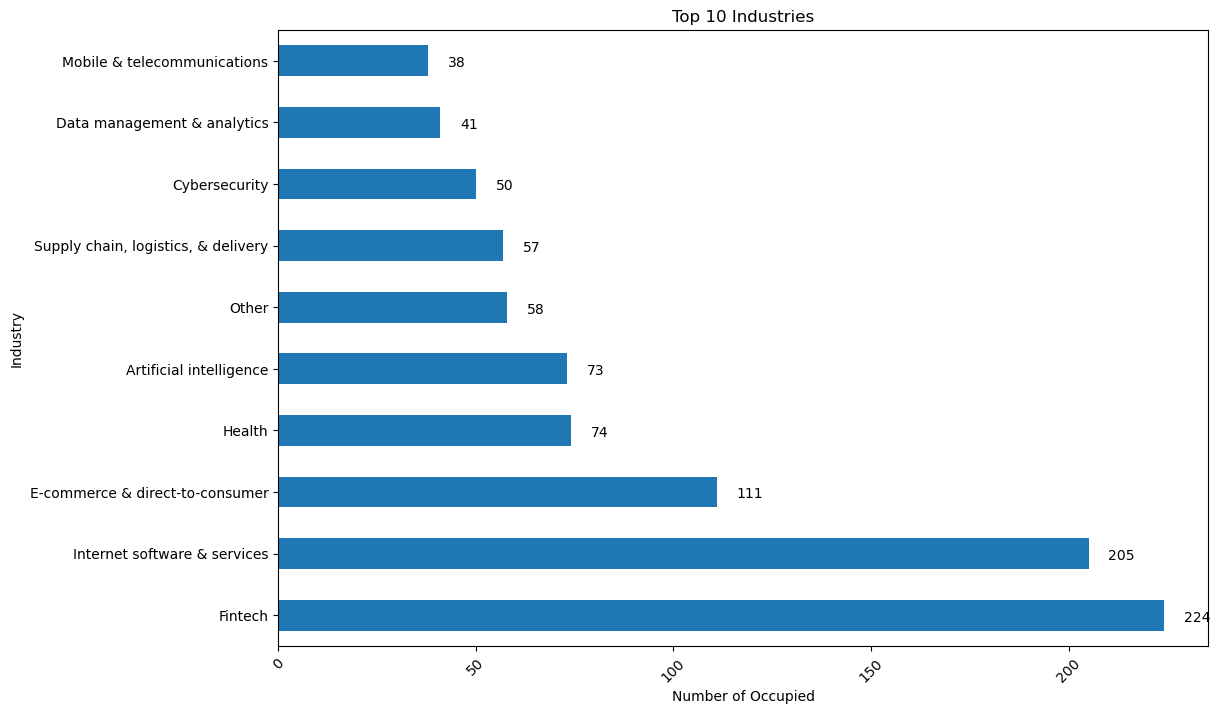

In [180]:
# create horizontal Barchart for top 10 Industries
ax = dist_ind.plot.barh(figsize=(12,8))


#Rotate the x-axis label by 45 degrees
plt.xticks(rotation=45)

#add data labels to the bars
for i, v in enumerate(dist_ind):
    ax.text(v + 5, i - 0.1,str(v),color='black',fontweight='light')
#set tittle and axis label
plt.title('Top 10 Industries')
plt.xlabel('Number of Occupied')
plt.ylabel('Industry')
 
#show the plot
plt.show()

In [54]:
#The number if distinct Country
df['Country'].nunique()

46

In [55]:
# find country with the most number of occurances
dist_com = df['Country'].value_counts()
most_common_country = dist_com.index[0]

#print the result
print(f"The country with the most number of occurance is {most_common_country}")

The country with the most number of occurance is United States


In [58]:
# count the number od occurances and select top 10
dist_country = df['Country'].value_counts().head(10)
dist_country

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64

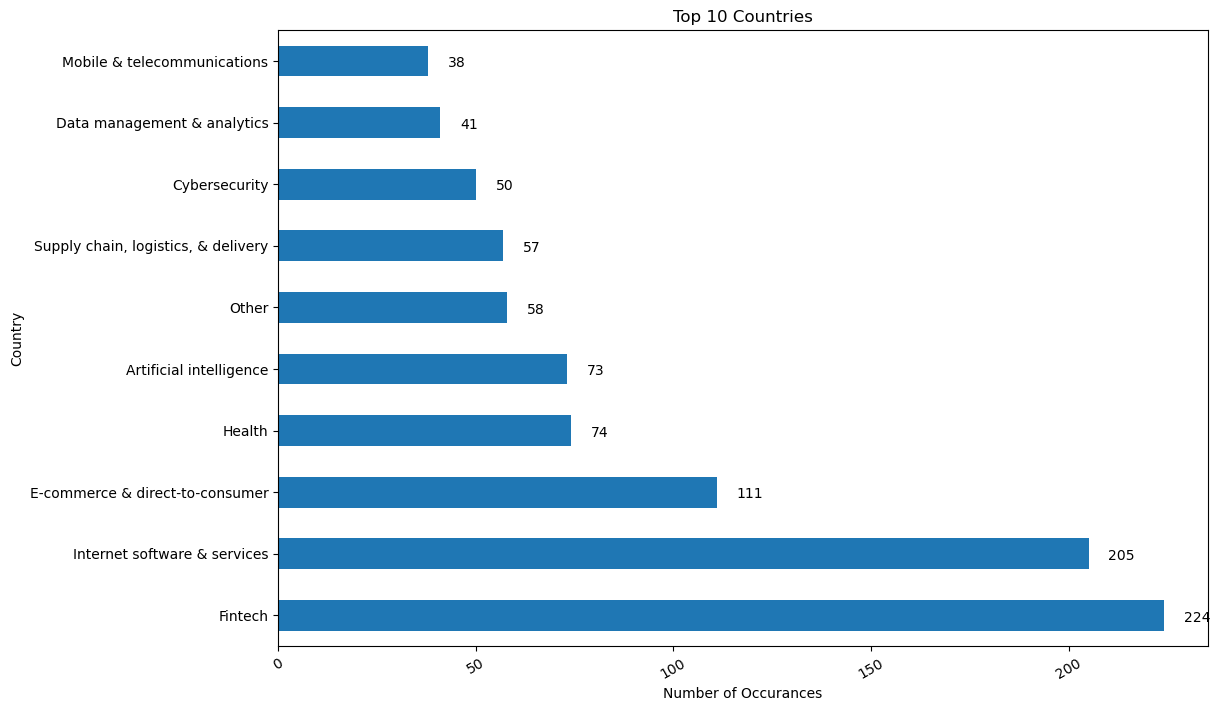

In [60]:
# create horizontal Barchart for top 10 Country
ax = dist_ind.plot.barh(figsize=(12,8))


#Rotate the x-axis label by 30 degrees
plt.xticks(rotation=30)

#add data labels to the bars
for i, v in enumerate(dist_ind):
    ax.text(v + 5, i - 0.1,str(v),color='black',fontweight='light')
#set tittle and axis label
plt.title('Top 10 Countries')
plt.xlabel('Number of Occurances')
plt.ylabel('Country')
 
#show the plot
plt.show()

In [181]:
# Get top 10 highest ROI values
top_10_roi = df.nlargest(10, 'ROI')['ROI']

# Display top 10 highest ROI values
print(top_10_roi)


0     1.720000e+11
2     9.800000e+10
1     9.300000e+10
3     9.300000e+10
4     4.200000e+10
5     3.942800e+10
6     3.800000e+10
7     3.600000e+10
9     3.500000e+10
10    3.100000e+10
Name: ROI, dtype: float64


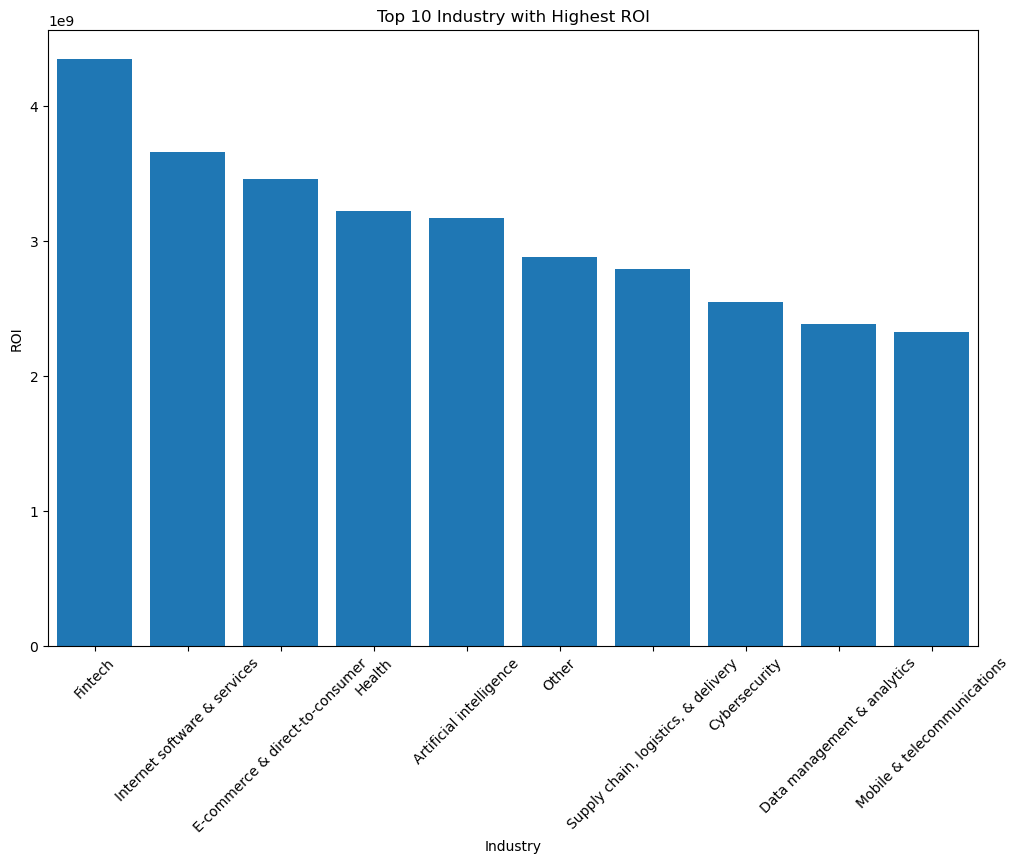

In [184]:
# Group by Industry and calculate mean ROI
ax = dist_ind.plot.bar(figsize=(12,8))
grouped_df = df.groupby('Industry')['ROI'].mean().reset_index()

# Sort by ROI in descending order
sorted_df = grouped_df.sort_values(by='ROI', ascending=False)

# Get top 10 industries with highest ROI
top_10_industries = sorted_df.head(10)
#Rotate the x-axis label by 30 degrees
plt.xticks(rotation=45)


# Plot bar chart of top 10 industries with highest ROI
plt.bar(top_10_countries['Industry'], top_10_industries['ROI'])
plt.title('Top 10 Industry with Highest ROI')
plt.xlabel('Industry')
plt.ylabel('ROI')
plt.show()


In [137]:
# Group by city and count number of startups/unicorns
startups_by_city = df.groupby('City')['Funding'].count()

# Get top 10 cities with most startups/unicorns
top_cities = startups_by_city.nlargest(10)

# Display top 10 cities with most startups/unicorns
print('Top 10 cities with most Startups/unicorns:')
print(top_cities)


Top 10 cities with most Startups/unicorns:
City
San Francisco    153
New York         108
Beijing           65
Shanghai          44
London            35
Bengaluru         29
Shenzhen          20
Paris             19
Berlin            18
Palo Alto         18
Name: Funding, dtype: int64


In [138]:
 # Calculate correlation coefficients between columns
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)


                Valuation   Funding  Age at Joining       ROI
Valuation        1.000000 -0.210703        0.014188  0.844835
Funding         -0.210703  1.000000       -0.019955 -0.701024
Age at Joining   0.014188 -0.019955        1.000000  0.021272
ROI              0.844835 -0.701024        0.021272  1.000000


C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_864\3375821389.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_864\3470366663.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



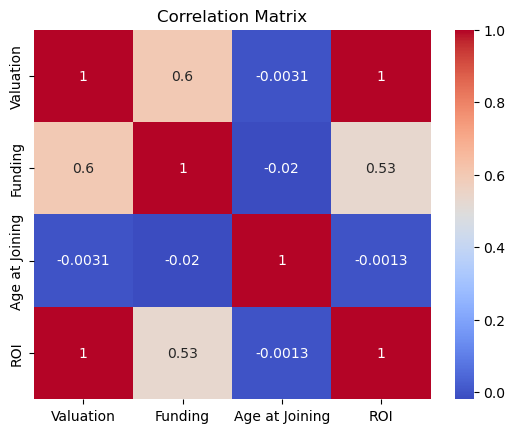

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation coefficients between columns
corr_matrix = df.corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The above heatmap is showing the correlation matrix with insights into the relationships between the 'ROI', 'Age at Joining', 'Funding' and 'Valuation'.
The heatmap shows the pairwise correlations between all columns in as listed above, 
with darker colors indicating stronger correlations.

<Figure size 1200x800 with 0 Axes>

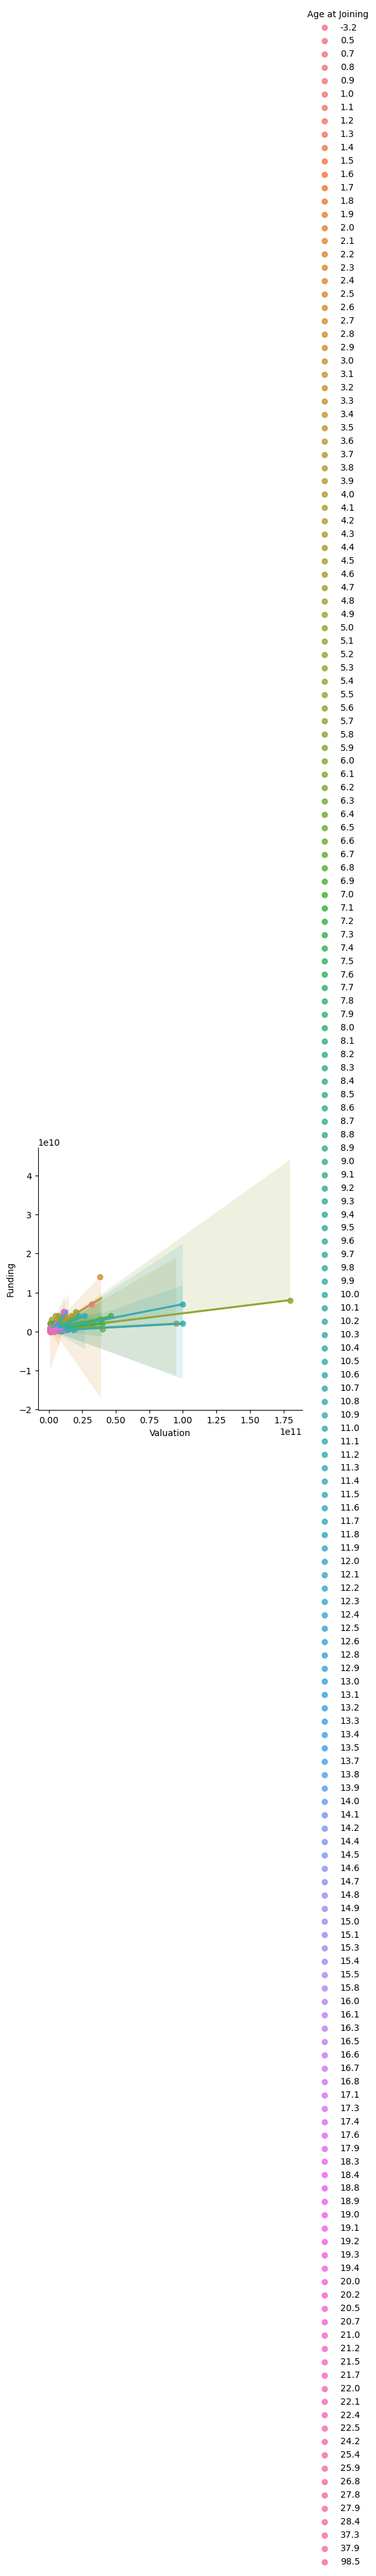

In [192]:
import seaborn as sns
#Visualize CCTV cameras and Furnished Apartment by Price
#Visualize Proprty and Furnished Apartment by Price  
plt.figure(figsize=(12, 8))
sns.lmplot(x='Valuation', y='Funding', data=df, hue= 'Age at Joining')
plt.show()